In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

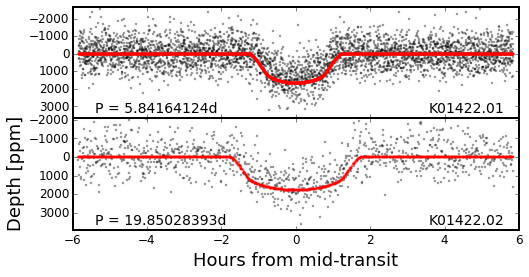

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

6.5272853302936564

In [6]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 74.4 ms per loop


In [7]:
#fit = model.fit_leastsq(params, options={'disp':True})
#fig = model.plot_planets(lc.default_params, color='b'); 
#fig = model.plot_planets(model._bestfit, color='r', fig=fig);

Now, let's do a test `emcee` run (this many iterations takes about 3 minutes):

In [8]:
import time
start = time.time()
model.fit_emcee(nburn=5, niter=10); 
stop = time.time()
print 'emcee fit took {:.1f} minutes.'.format((stop-start)/60)

emcee fit took 3.7 minutes.


In [9]:
model.save_hdf('test_model.h5')

In [10]:
model = TransitModel.load_hdf('test_model.h5')

In [11]:
model.samples.head()

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0.066485,0.999970,0.487172,0.460964,4.173160,5.841694,135.922530,0.391313,0.037694,0.028174,4.826371,19.850268,133.650436,0.444249,0.038722,0.022583,4.246579
1,0.066485,0.999970,0.487172,0.460964,4.173160,5.841694,135.922530,0.391313,0.037694,0.028174,4.826371,19.850268,133.650436,0.444249,0.038722,0.022583,4.246579
2,0.068837,0.999969,0.495473,0.459917,4.169193,5.841691,135.922526,0.383592,0.037730,0.029681,4.868027,19.850270,133.650448,0.427951,0.038732,0.024850,4.167208
3,0.075099,1.000005,0.552630,0.497388,3.944421,5.841639,135.922778,0.443566,0.037987,0.045240,5.602568,19.850295,133.650077,0.594797,0.038696,0.027705,4.317960
4,0.075099,1.000005,0.552630,0.497388,3.944421,5.841639,135.922778,0.443566,0.037987,0.045240,5.602568,19.850295,133.650077,0.594797,0.038696,0.027705,4.317960


In [12]:
model.samples.std()

dilution    0.076139
flux_zp     0.000125
q1          0.139104
q2          0.138689
rho         1.459678
period_1    0.000116
epoch_1     0.001723
b_1         0.263112
rprs_1      0.000539
ecc_1       0.036142
omega_1     1.605390
period_2    0.000158
epoch_2     0.001222
b_2         0.264650
rprs_2      0.000480
ecc_2       0.037392
omega_2     1.577728
dtype: float64

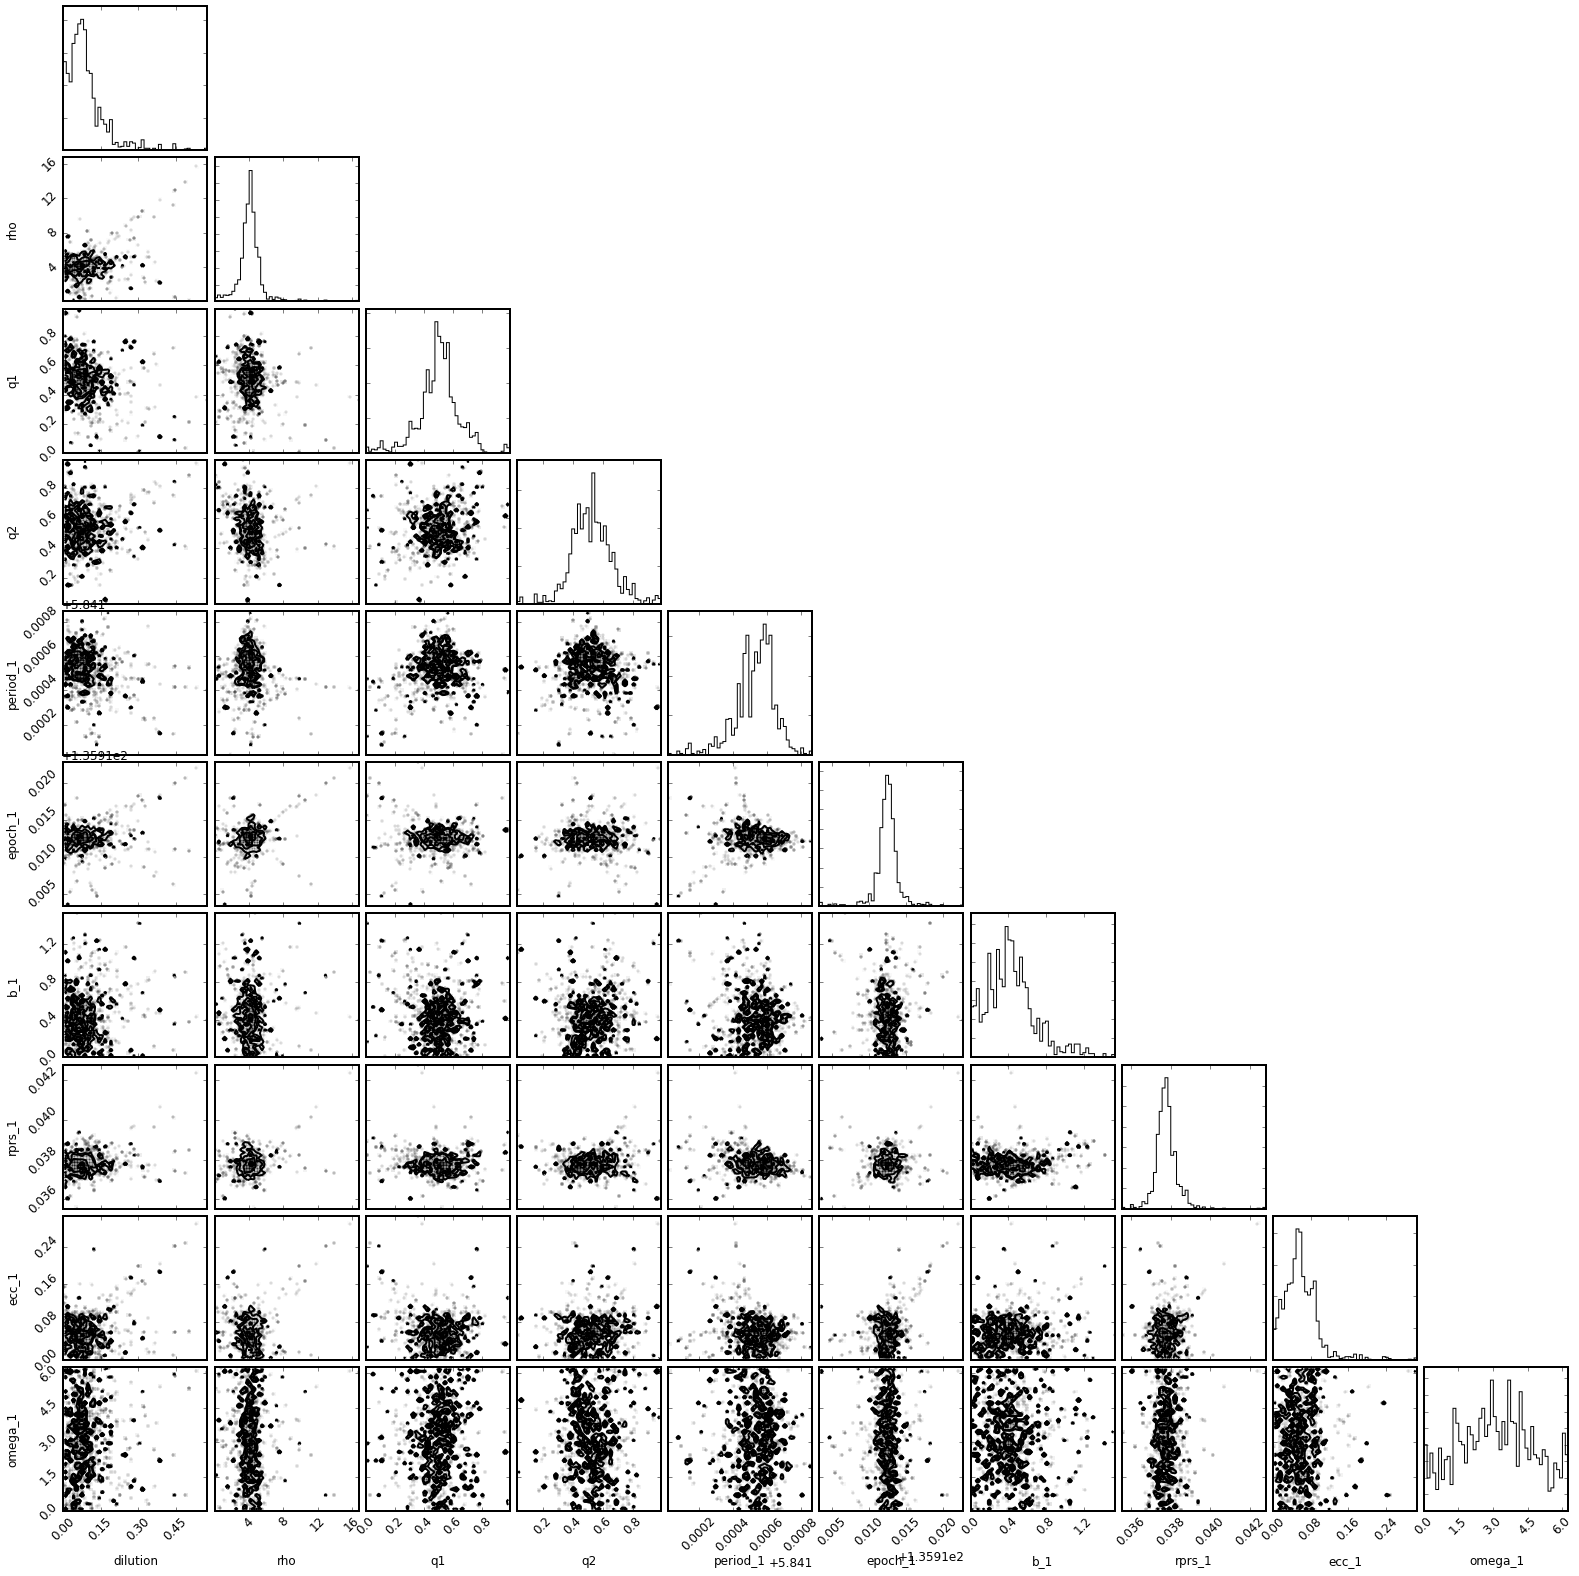

In [13]:
fig1 = model.triangle(i=0); # for first planet

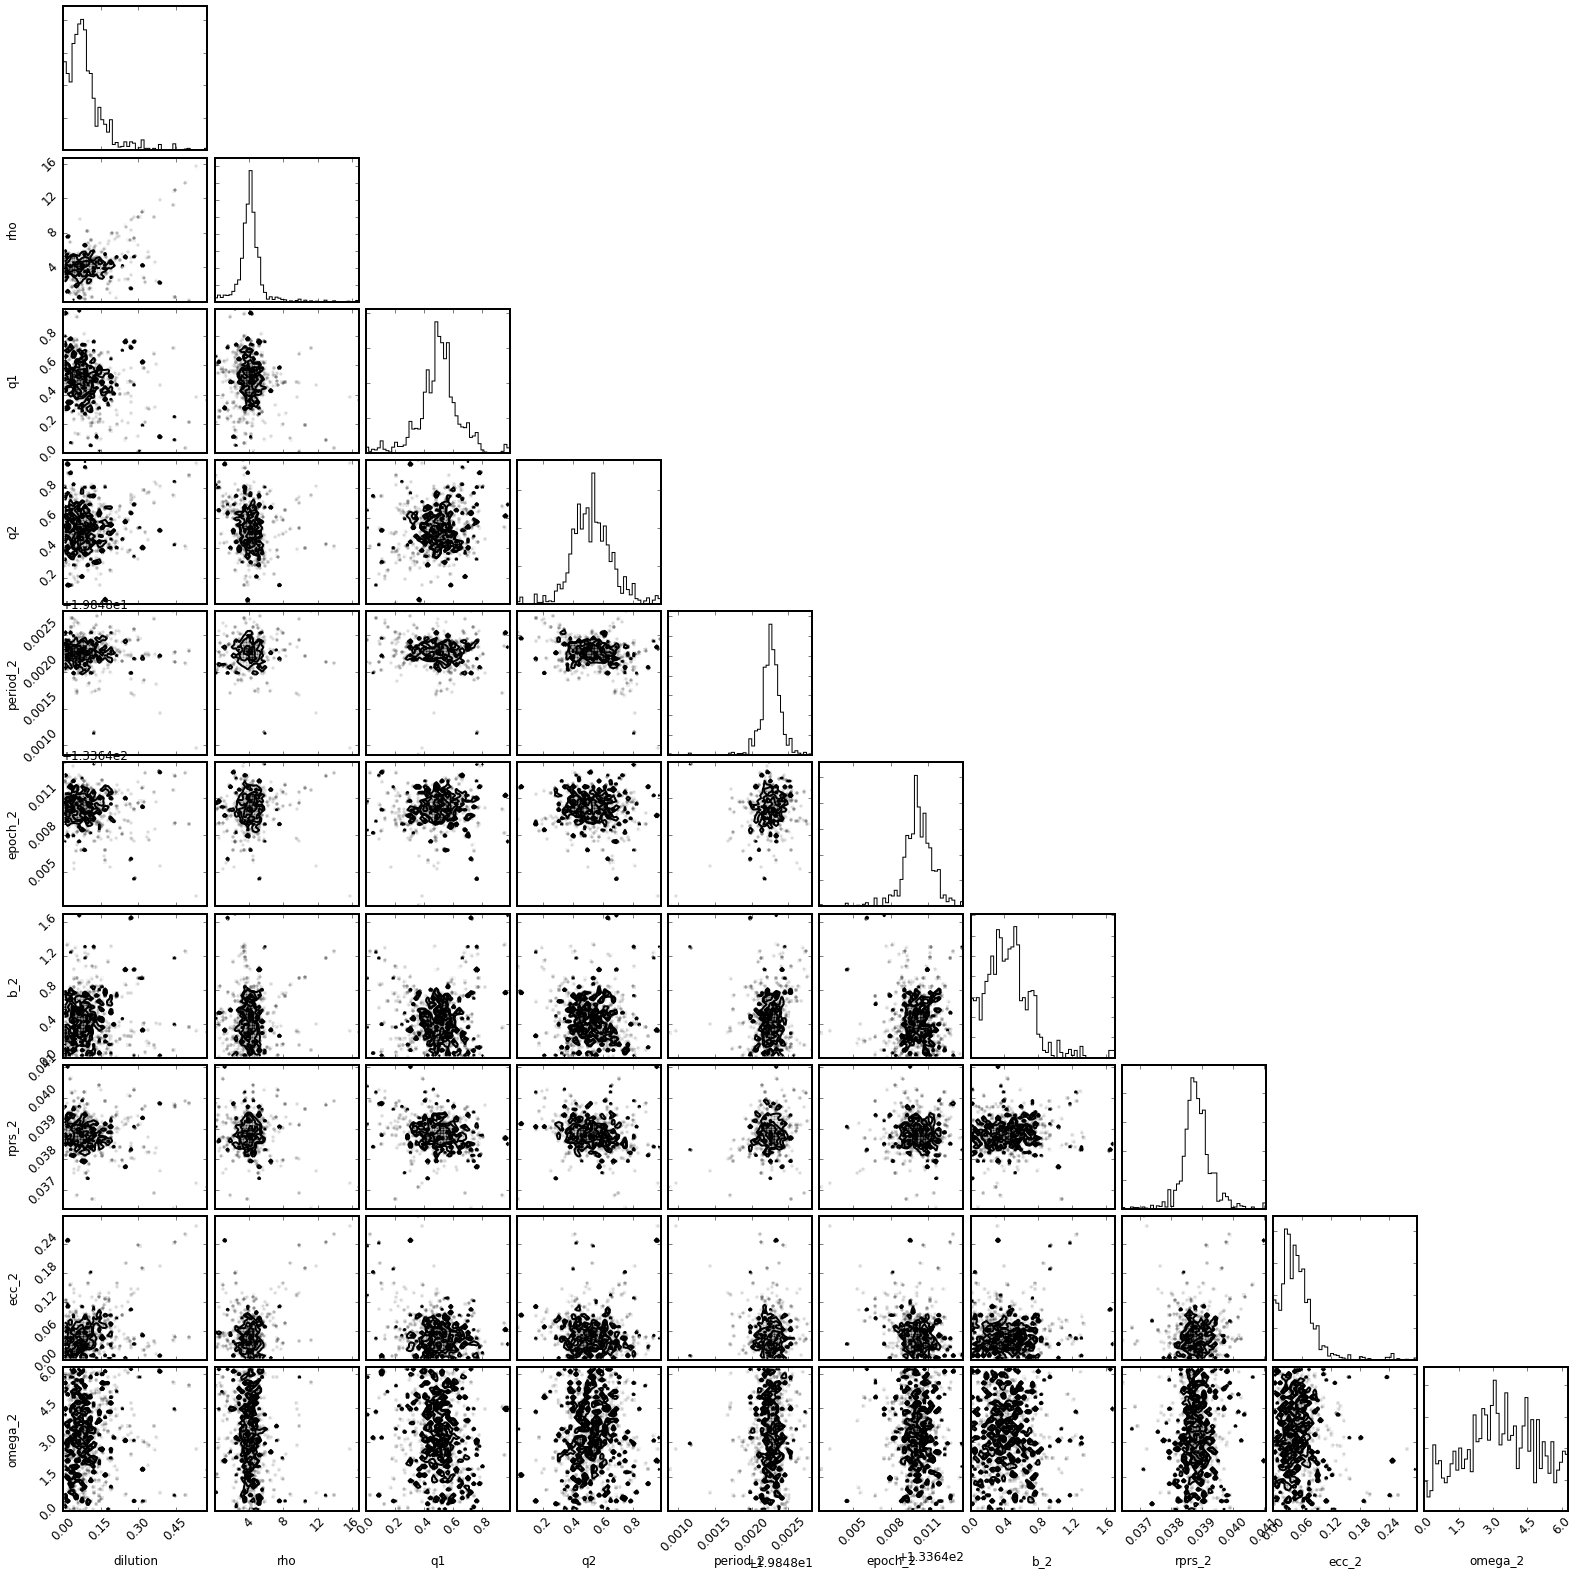

In [14]:
fig2 = model.triangle(i=1)